In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# 1. Creating the dataset inside the code
data = {
    'car_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'doornumber': [4, 2, 4, 4, 2, 4, 4, 4, 2, 4],
    'citympg': [22, 18, 24, 20, 28, 21, 19, 23, 27, 22],
    'carlength': [145, 140, 130, 110, 150, 135, 155, 145, 120, 125],
    'price': [15000, 18000, 20000, 25000, 22000, 16000, 21000, 30000, 17000, 19000],
    'cylindernumber': [4, 6, 4, 6, 4, 6, 4, 6, 4, 4],
    'enginetype': ['V6', 'V8', 'V6', 'V6', 'V4', 'V6', 'V8', 'V8', 'V4', 'V6'],
    'brand': ['Toyota', 'Ford', 'Honda', 'BMW', 'Mercedes', 'Audi', 'Porsche', 'BMW', 'Nissan', 'Hyundai']
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

In [2]:
# 2. Drop the 'car_ID' column
df = df.drop(columns=['car_ID'])

In [3]:
# 3. Count cars as per their "doornumber"
doornumber_count = df['doornumber'].value_counts()
print("Count of cars as per their doornumber:")
print(doornumber_count)

Count of cars as per their doornumber:
doornumber
4    7
2    3
Name: count, dtype: int64


In [4]:
# 4. Print the citympg, carlength, and price where carlength is between 100 and 150
filtered_df = df[(df['carlength'] >= 100) & (df['carlength'] <= 150)][['citympg', 'carlength', 'price']]
print("\nFiltered cars with carlength between 100 and 150:")
print(filtered_df)



Filtered cars with carlength between 100 and 150:
   citympg  carlength  price
0       22        145  15000
1       18        140  18000
2       24        130  20000
3       20        110  25000
4       28        150  22000
5       21        135  16000
7       23        145  30000
8       27        120  17000
9       22        125  19000


In [5]:
# 5. Print the records of cars where "cylindernumber" is either four or six
cylinder_filtered_df = df[df['cylindernumber'].isin([4, 6])]
print("\nCars with cylindernumber either 4 or 6:")
print(cylinder_filtered_df)


Cars with cylindernumber either 4 or 6:
   doornumber  citympg  carlength  price  cylindernumber enginetype     brand
0           4       22        145  15000               4         V6    Toyota
1           2       18        140  18000               6         V8      Ford
2           4       24        130  20000               4         V6     Honda
3           4       20        110  25000               6         V6       BMW
4           2       28        150  22000               4         V4  Mercedes
5           4       21        135  16000               6         V6      Audi
6           4       19        155  21000               4         V8   Porsche
7           4       23        145  30000               6         V8       BMW
8           2       27        120  17000               4         V4    Nissan
9           4       22        125  19000               4         V6   Hyundai


In [7]:
# 6. Create two separate dataframes (numdf, catdf) for numeric and categorical values
numdf = df.select_dtypes(include=['float64', 'int64'])
catdf = df.select_dtypes(include=['object'])

In [8]:
# 7. Create a correlation matrix of the numeric dataframe (numdf)
correlation_matrix = numdf.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                doornumber   citympg  carlength     price  cylindernumber
doornumber        1.000000 -0.411938  -0.056575  0.198348        0.089087
citympg          -0.411938  1.000000  -0.040985  0.036411       -0.504919
carlength        -0.056575 -0.040985   1.000000  0.031938       -0.181444
price             0.198348  0.036411   0.031938  1.000000        0.371075
cylindernumber    0.089087 -0.504919  -0.181444  0.371075        1.000000


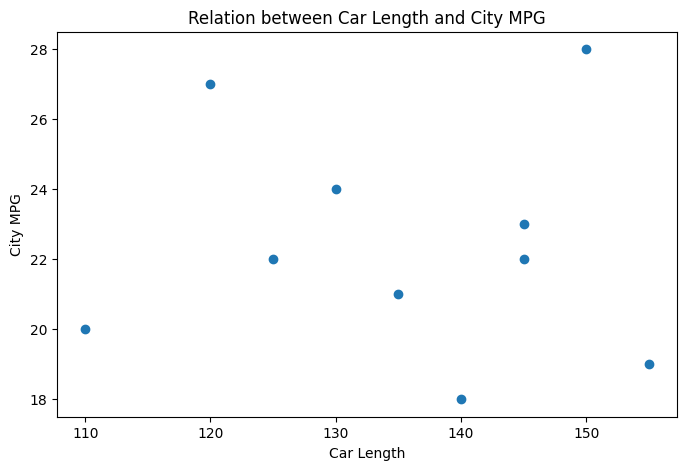

In [9]:
# 8. Visualize the relation between "carlength" and "citympg" with a plot
plt.figure(figsize=(8, 5))
plt.scatter(df['carlength'], df['citympg'])
plt.title('Relation between Car Length and City MPG')
plt.xlabel('Car Length')
plt.ylabel('City MPG')
plt.show()

In [10]:
# Inference:
# We can observe that as the carlength increases, the city mpg tends to either remain similar or slightly reduce.

# 9. Calculate the outliers for the column "price" using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
# 10. Filter the records of cars which have "price" as outliers
outlier_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("\nOutlier records based on price:")
print(outlier_df)


Outlier records based on price:
   doornumber  citympg  carlength  price  cylindernumber enginetype brand
7           4       23        145  30000               6         V8   BMW


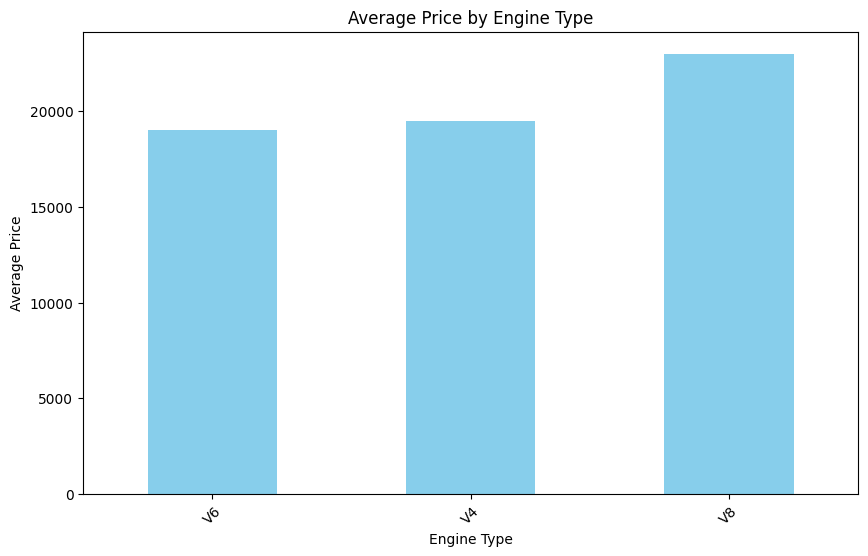

In [12]:
# 11. Plot a bar plot comparing the average price of different "enginetypes" in different colors
avg_price_by_enginetype = df.groupby('enginetype')['price'].mean().sort_values()
avg_price_by_enginetype.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()